In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Numeric feature correlations with target:
deposit     1.000000
duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034901
day        -0.056326
campaign   -0.128081
Name: deposit, dtype: float64


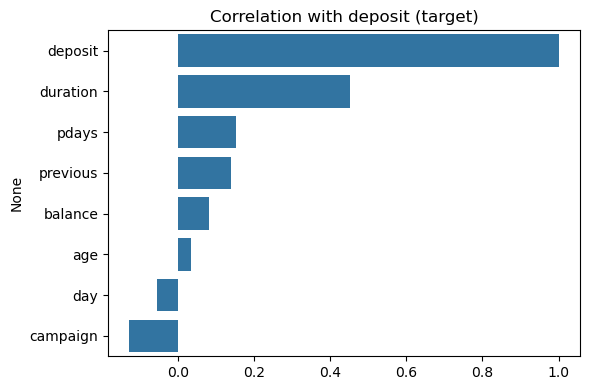


Chi-squared scores for categorical features:
contact      953.667451
housing      244.474430
loan         118.635404
job          103.960727
poutcome      67.848776
education     44.909241
month         28.774412
default       18.193635
marital       16.646005
dtype: float64


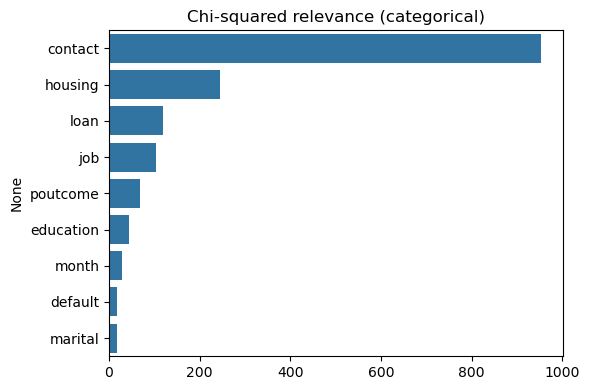

In [2]:
# Load data
df = pd.read_csv("dataset/bank.csv")

# Encode target
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Separate numeric and categorical
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('deposit')
cat_cols = df.select_dtypes(include='object').columns.tolist()

# --- 1. Correlation for numeric features ---
correlations = df[numeric_cols + ['deposit']].corr()['deposit'].sort_values(ascending=False)
print("Numeric feature correlations with target:")
print(correlations)

# Optional: visualize
plt.figure(figsize=(6, 4))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlation with deposit (target)")
plt.tight_layout()
plt.show()

# --- 2. Chi-squared test for categorical features ---
# Label encode categorical columns
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X_cat = df_encoded[cat_cols]
y = df_encoded['deposit']

chi_scores, _ = chi2(X_cat, y)
chi_result = pd.Series(chi_scores, index=cat_cols).sort_values(ascending=False)

print("\nChi-squared scores for categorical features:")
print(chi_result)

# Optional: visualize
plt.figure(figsize=(6, 4))
sns.barplot(x=chi_result.values, y=chi_result.index)
plt.title("Chi-squared relevance (categorical)")
plt.tight_layout()
plt.show()